## Lab 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2025-11-04 08:48:47.583283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762246127.980258      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762246128.098170      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df1 = pd.read_csv('/kaggle/input/bodyfat-endsem/bodyfat.csv')
df1.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
x = df1.drop('BodyFat', axis=1)
y = df1['BodyFat']

In [4]:
for i in df1.columns:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    df1 = df1[(df1[i]<ub)&(df1[i]>lb)]

In [5]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y.values.reshape((-1, 1)))

In [6]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
model1 = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762246145.356354      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762246145.357112      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
history1 = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10


I0000 00:00:1762246148.640886      99 service.cc:148] XLA service 0x781ae0003590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762246148.642147      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762246148.642166      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762246148.897134      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/7 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - loss: 2.8278 - mae: 1.2974

I0000 00:00:1762246149.742174      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 1.8114 - mae: 1.0534 - val_loss: 0.5164 - val_mae: 0.6092
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9860 - mae: 0.7897 - val_loss: 0.4148 - val_mae: 0.5587
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7364 - mae: 0.6743 - val_loss: 0.4035 - val_mae: 0.5411
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6041 - mae: 0.6195 - val_loss: 0.4013 - val_mae: 0.5209
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4607 - mae: 0.5266 - val_loss: 0.3731 - val_mae: 0.4857
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4326 - mae: 0.4962 - val_loss: 0.2887 - val_mae: 0.4302
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3210 - mae: 0.4416 - val_loss: 0.2230 - val_mae: 0.3736
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2533 - mae: 0.3793 - val_loss: 0.1792 - val_mae: 0.3366
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2080 - mae: 0.3456 - val_loss: 

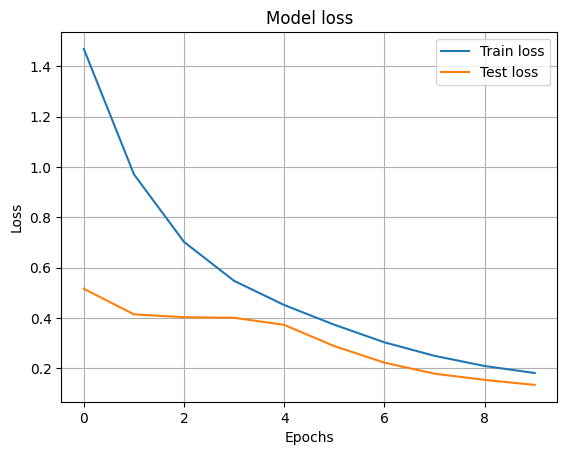

In [10]:
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Lab 2

In [11]:
df2 = pd.read_csv('/kaggle/input/churn-endsem/Churn_Modelling.csv')
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df2.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [14]:
for i in num_vars:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    df2 = df2[(df2[i]<ub) & (df2[i]>lb)]

In [15]:
x = df2.drop('Exited', axis=1)
y = df2['Exited']

In [16]:
x = pd.get_dummies(x, columns=cat_vars, drop_first=True).astype(int)

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [19]:
x_train.shape

(7612, 11)

In [20]:
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7773 - loss: 0.5061 - val_accuracy: 0.8298 - val_loss: 0.3813
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - loss: 0.4092 - val_accuracy: 0.8435 - val_loss: 0.3588
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8444 - loss: 0.3817 - val_accuracy: 0.8550 - val_loss: 0.3430
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3529 - val_accuracy: 0.8529 - val_loss: 0.3359
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3360 - val_accuracy: 0.8550 - val_loss: 0.3279
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3492 - val_accuracy: 0.8550 - val_loss: 0.3334
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.3353 - val_accuracy: 0.8582 - val_loss: 0.3283
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3361 - val_accuracy: 0.

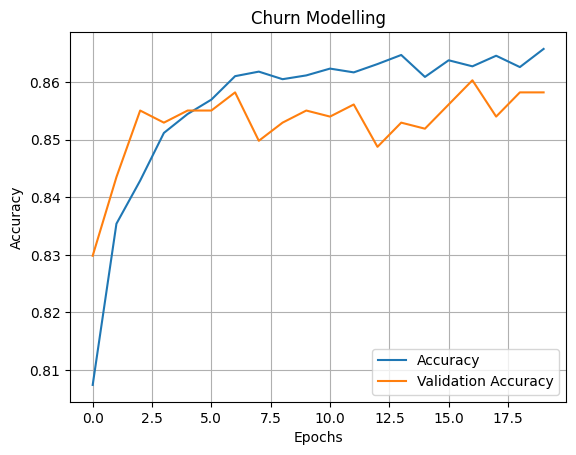

In [23]:
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Churn Modelling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Lab 3/4

In [24]:
train_path = '/kaggle/input/facemask789/Face Mask Dataset/Train'
val_path = '/kaggle/input/facemask789/Face Mask Dataset/Validation'
test_path = '/kaggle/input/facemask789/Face Mask Dataset/Test'

In [25]:
from tensorflow.keras.utils import image_dataset_from_directory

In [26]:
mask_train = image_dataset_from_directory(
    train_path,
    image_size=(180, 180),
    batch_size=32,
    shuffle=True
)
mask_val = image_dataset_from_directory(
    val_path,
    image_size=(180, 180),
    batch_size=32,
    shuffle=True
)
mask_test = image_dataset_from_directory(
    test_path,
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [27]:
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dropout

In [28]:
norm_layer = Rescaling(1./255)
mask_train = mask_train.map(lambda x, y: (norm_layer(x), y))
mask_val = mask_val.map(lambda x, y: (norm_layer(x), y))
mask_test = mask_test.map(lambda x, y: (norm_layer(x), y))

In [29]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history3 = model3.fit(mask_train, validation_data=(mask_val), epochs=10, batch_size=32)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.8870 - loss: 0.2929 - val_accuracy: 0.9850 - val_loss: 0.0471
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9797 - loss: 0.0533 - val_accuracy: 0.9812 - val_loss: 0.0461
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9840 - loss: 0.0399 - val_accuracy: 0.9925 - val_loss: 0.0226
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9880 - loss: 0.0330 - val_accuracy: 0.9962 - val_loss: 0.0136
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9899 - loss: 0.0291 - val_accuracy: 0.9912 - val_loss: 0.0235
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9925 - val_loss: 0.0335
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9931 - loss: 0.0200 - val_accuracy: 0.9900 - val_loss: 0.0206
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9920 - loss: 0.0201 - 

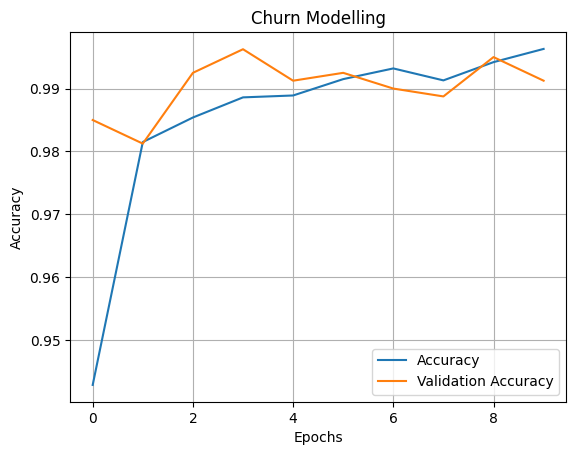

In [32]:
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Churn Modelling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Lab 7

In [33]:
df3 = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df3.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [34]:
df3['sentiment'] = df3['sentiment'].map({'positive': 1, 'negative': 0})

In [35]:
train_df, val_df = train_test_split(df3, test_size=0.2, stratify=df3['sentiment'], random_state=42)

In [36]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [38]:
train_df['clean'] = train_df['review'].apply(clean_text)
val_df['clean'] = val_df['review'].apply(clean_text)

In [39]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
def lemm_text(text):
    tokens = word_tokenize(text)
    lemma = [lemm.lemmatize(w) for w in tokens]
    return " ".join(lemma)

In [41]:
train_df['lemma'] = train_df['clean'].apply(lemm_text)
val_df['lemma'] = val_df['clean'].apply(lemm_text)

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
vs = 20000
ml = 200
oov = "<OOV>"
tokenizer = Tokenizer(num_words=vs, oov_token=oov)
tokenizer.fit_on_texts(train_df['lemma'])

In [44]:
train_seq = tokenizer.texts_to_sequences(train_df['lemma'])
train_pad = pad_sequences(train_seq, maxlen=ml, padding='post', truncating='post')
val_seq = tokenizer.texts_to_sequences(val_df['lemma'])
val_pad = pad_sequences(val_seq, maxlen=ml, padding='post', truncating='post')

In [45]:
from tensorflow.keras.layers import Embedding, LSTM

In [46]:
model4 = Sequential([
    Embedding(vs, 128, input_length=ml),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [47]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history4 = model4.fit(
    train_pad, train_df['sentiment'].values,
    epochs=5,
    validation_data=(val_pad, val_df['sentiment'].values),
    batch_size=128
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.5016 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4999 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4983 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5054 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6936


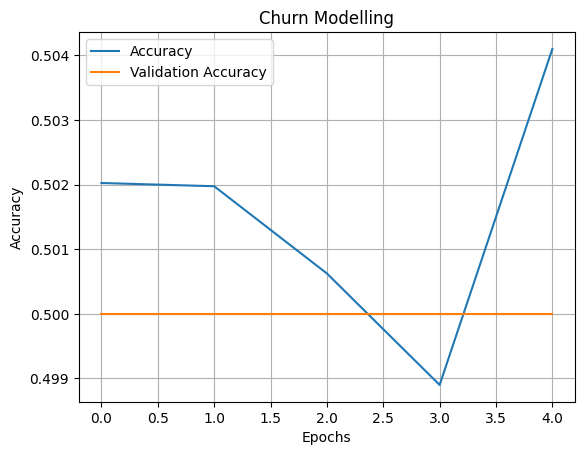

In [49]:
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Churn Modelling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Lab 8

In [65]:
from tensorflow.keras.layers import Input

In [66]:
from tensorflow.keras import Model

In [98]:
data = pd.read_csv('/kaggle/input/hin-english/hin.txt', sep='\t', usecols=[0,1], header=None, names=['english', 'hindi'])
data.head()

,english,hindi
0,Wow!,वाह!
1,Duck!,झुको!
2,Duck!,बतख़!
3,Help!,बचाओ!
4,Jump.,उछलो.


In [99]:
def preprocess_text(text):
    text = str(text).lower().strip()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

In [100]:
data['english'] = data['english'].apply(preprocess_text)
data['hindi'] = data['hindi'].apply(lambda x: '<start>' + str(x) + '<end>')

In [101]:
train, temp = train_test_split(data, test_size=0.2, random_state=42)
test, val = train_test_split(temp, test_size=0.5, random_state=42)

In [102]:
eng_tok = Tokenizer(filters='')
eng_tok.fit_on_texts(train['english'])
ivs = len(eng_tok.word_index) + 1

hin_tok = Tokenizer(filters='')
hin_tok.fit_on_texts(train['hindi'])
tvs = len(hin_tok.word_index) + 1

In [103]:
x_all = eng_tok.texts_to_sequences(data['english'])
y_all = hin_tok.texts_to_sequences(data['hindi'])
mli = max(len(s) for s in x_all)
mlt = max(len(s) for s in y_all)

In [104]:
def token_data(tokenizer, data, column, max_len):
    seq = tokenizer.texts_to_sequences(data[column])
    return pad_sequences(seq, maxlen=max_len, padding='post')

In [105]:
x_train = token_data(eng_tok, train, 'english', mli)
x_val = token_data(eng_tok, val, 'english', mli)
x_test = token_data(eng_tok, test, 'english', mli)

y_train = token_data(hin_tok, train, 'hindi', mlt)
y_val = token_data(hin_tok, val, 'hindi', mlt)
y_test = token_data(hin_tok, test, 'hindi', mlt)

In [106]:
def build_lstm(ivs, tvs, emb_dim, units, mli, mlt):
    enc_inputs = Input(shape=(mli,))
    enc_emb = Embedding(ivs, emb_dim, mask_zero=True)(enc_inputs)
    enc_cell = LSTM(units, return_sequences=False, return_state=True)
    _, state_h, state_c = enc_cell(enc_emb)
    enc_states = [state_h, state_c]

    dec_inputs = Input(shape=(mlt-1,))
    dec_emb = Embedding(tvs, emb_dim, mask_zero=True)(dec_inputs)
    dec_cell = LSTM(units, return_sequences=True, return_state=True)
    dec_output, _, _ = dec_cell(dec_emb, initial_state=enc_states)

    dec_dense = Dense(tvs, activation='softmax')
    dec_outputs = dec_dense(dec_output)

    model = Model([enc_inputs, dec_inputs], dec_outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [107]:
y_train_in = y_train[:, :-1]
y_val_in = y_val[:, :-1]
y_test_in = y_test[:, :-1]

In [108]:
y_train_out = y_train[:, 1:]
y_val_out = y_val[:, 1:]
y_test_out = y_test[:, 1:]

In [109]:
model5 = build_lstm(ivs, tvs, 256, 256, mli, mlt)

In [110]:
model5.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 21)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 19, 256)   │    574,208 │ input_layer_10[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_6         │ (None, 19)        │          0 │ input_layer_10[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 21, 256)   │    832,256 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ [(None, 256),     │    525,312 │ embedding_7[0][0… │
│                     │ (None, 256),      │            │ not_equal_6[0][0] │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ [(None, 21, 256), │    525,312 │ embedding_8[0][0… │
│                     │ (None, 256),      │            │ lstm_9[0][1],     │
│                     │ (None, 256)]      │            │ lstm_9[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 21, 3251)  │    835,507 │ lstm_10[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,292,595 (12.56 MB)

 Trainable params: 3,292,595 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
history5 = model5.fit(
    [x_train, y_train_in], y_train_out,
    validation_data=([x_val, y_val_in], y_val_out),
    epochs=20, batch_size=64
)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1576 - loss: 2.6006 - val_accuracy: 0.0826 - val_loss: 4.5303
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1617 - loss: 2.4788 - val_accuracy: 0.0839 - val_loss: 4.5240
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1721 - loss: 2.3566 - val_accuracy: 0.0839 - val_loss: 4.5285
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1785 - loss: 2.2549 - val_accuracy: 0.0862 - val_loss: 4.5355
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1886 - loss: 2.1572 - val_accuracy: 0.0865 - val_loss: 4.5479
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1953 - loss: 2.0462 - val_accuracy: 0.0856 - val_loss: 4.5740
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2015 - loss: 1.9237 - val_accuracy: 0.0879 - val_loss: 4.5726
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2109 - loss: 1.8207 - val_accuracy: 0.0875 - v

# Lab 5

In [114]:
df6 = pd.read_csv('/kaggle/input/google-stock-prediction/GOOG.csv')
df6.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [115]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
df6['date'] = pd.to_datetime(df6['date'])
df6 = df6.sort_values('date')
data2 = df6[['date', 'close']].copy()

In [119]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(data2['close'].values.reshape(-1, 1))

In [124]:
def create_sequences(data, sl=60):
    x1, y1 = [], []
    for i in range(sl, len(data)):
        x1.append(data[i-sl:i, 0])
        y1.append(data[i, 0])
    return np.array(x1), np.array(y1)

In [125]:
x1, y1 = create_sequences(scaled_prices)

In [127]:
x1 = np.reshape(x1, (x1.shape[0], x1.shape[1], 1))

In [128]:
n = x1.shape[0]
ts = int(n*0.7)
vs = int(n*0.2)

x1_train, y1_train = x1[:ts], y1[:ts]
x1_val, y1_val = x1[ts:ts+vs], y1[ts:ts+vs]
x1_test, y1_test = x1[ts+vs:], y1[ts+vs:]

In [129]:
from tensorflow.keras.layers import SimpleRNN

In [131]:
model6 = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(60,1)),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [132]:
model6.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [133]:
history6 = model6.fit(
    x1_train, y1_train,
    validation_data=(x1_val, y1_val),
    epochs=20, batch_size=32
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.2484 - mae: 0.2484 - val_loss: 0.0626 - val_mae: 0.0626
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0485 - mae: 0.0485 - val_loss: 0.0336 - val_mae: 0.0336
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0663 - mae: 0.0663 - val_loss: 0.0803 - val_mae: 0.0803
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.0370 - val_mae: 0.0370
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0361 - mae: 0.0361 - val_loss: 0.0214 - val_mae: 0.0214
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0219 - mae: 0.0219 - val_loss: 0.0517 - val_mae: 0.0517
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0159 - mae: 0.0159 - val_loss: 0.0486 - val_mae: 0.0486
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0211 - val_mae: 0.0211
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.02

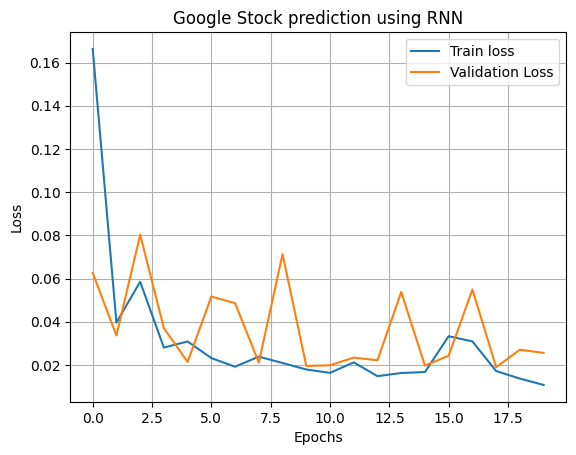

In [134]:
plt.plot(history6.history['loss'], label='Train loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Google Stock prediction using RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()